In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
import scipy.stats as sts

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
# Display the row's columns and data in dictionary format for Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fae4e4417f0>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [32]:
# Display the row's columns and data in dictionary format for Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fae4e441760>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [33]:
# Get a list of column names and types for Measurment
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Get a list of column names and types for Station
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

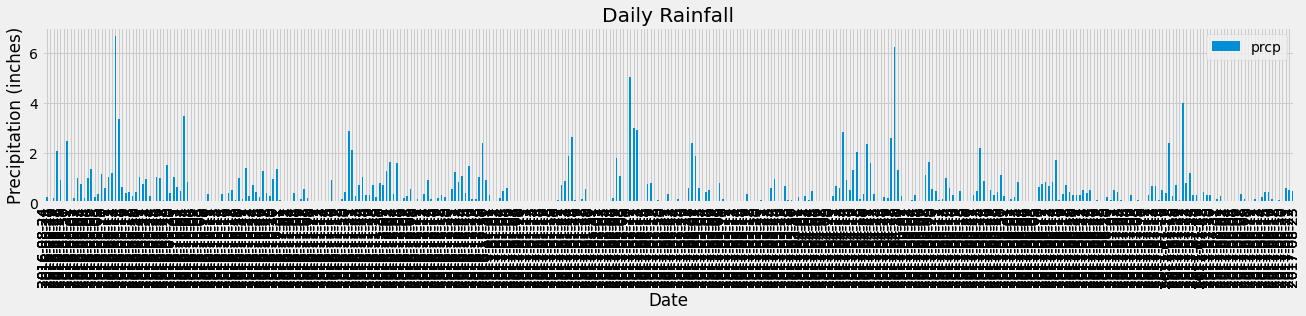

<Figure size 432x288 with 0 Axes>

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = DataFrame(date_prcp).set_index('date')

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
# Use DataFrame.plot() in order to create a bar chart of the data
date_prcp_df.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Daily Rainfall")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

plt.show()
plt.tight_layout()



In [64]:
date_prcp_df.prcp

date
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.22
              ... 
2017-08-22    0.50
2017-08-23    0.08
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.45
Name: prcp, Length: 2223, dtype: float64

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp = date_prcp_df.prcp

mean_numpy = np.mean(prcp)
print(f"The mean precipitation is {mean_numpy}")

median_numpy = np.median(prcp)
print(f"The median precipitation is {median_numpy}")

mode_scipy = sts.mode(prcp)
print(f"The mode precipitation at the LAX airport is {mode_scipy}")

The mean precipitation is 0.17646153846153845
The median precipitation is nan
The mode precipitation at the LAX airport is ModeResult(mode=array([0.]), count=array([873]))


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [68]:
# Close Session
session.close()